In [13]:
from load_dataset import load_time_series, load_dataset
import pandas as pd


ts, countries, years = load_time_series()
print(len(ts))
print(countries.shape)
print(years.shape)

15
(171,)
(20,)


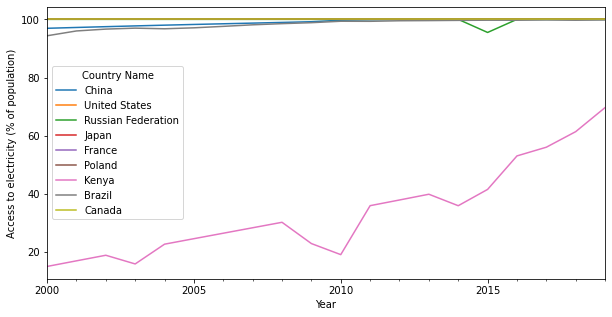

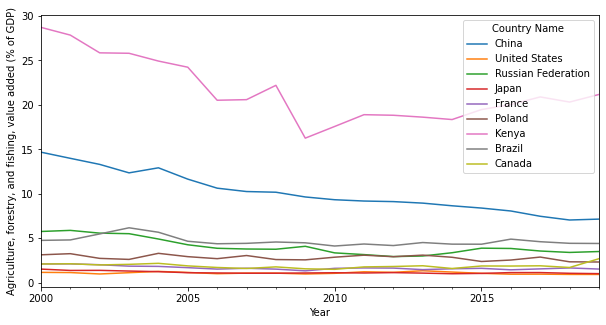

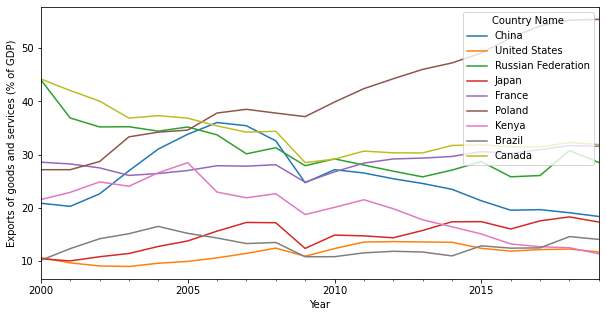

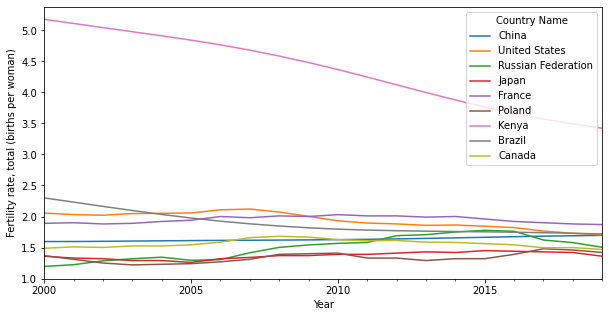

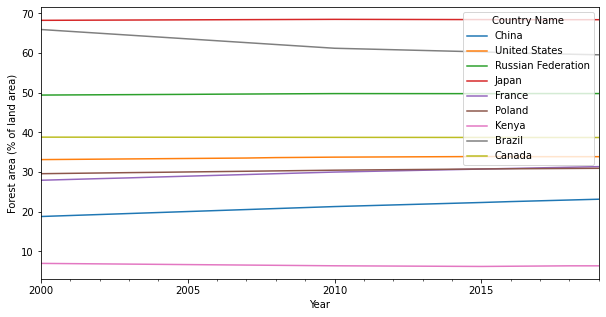

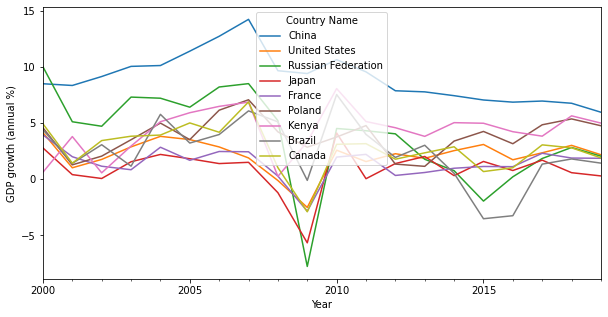

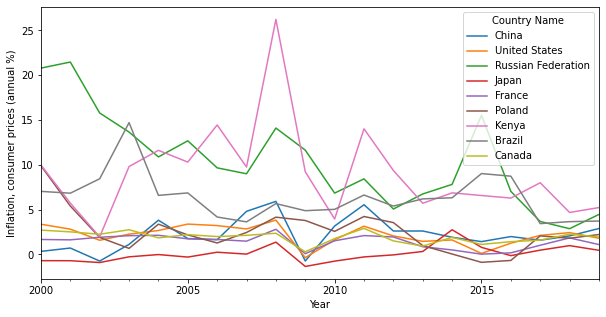

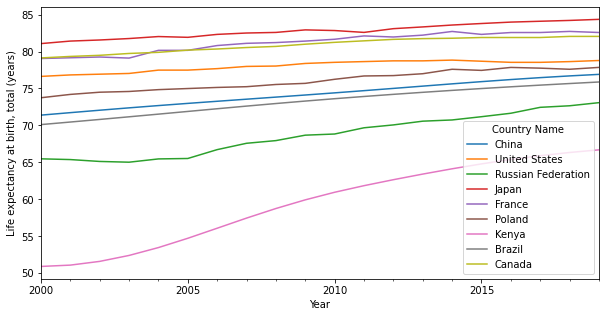

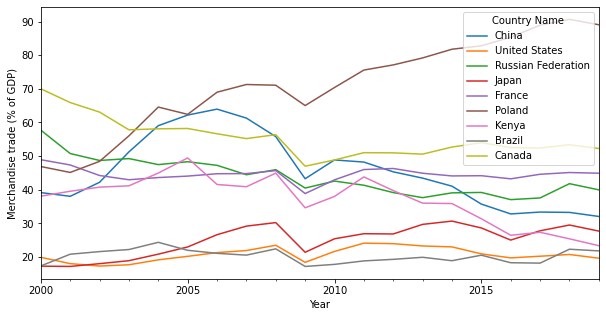

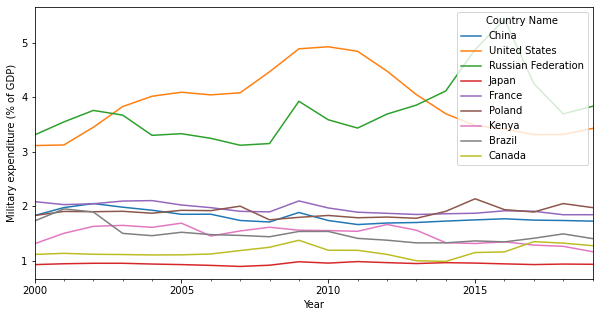

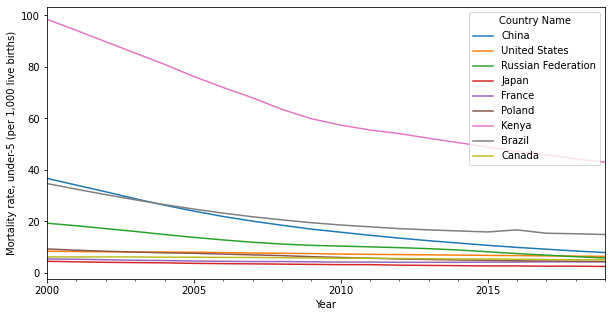

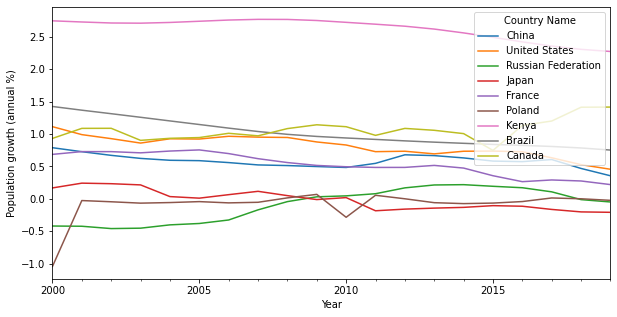

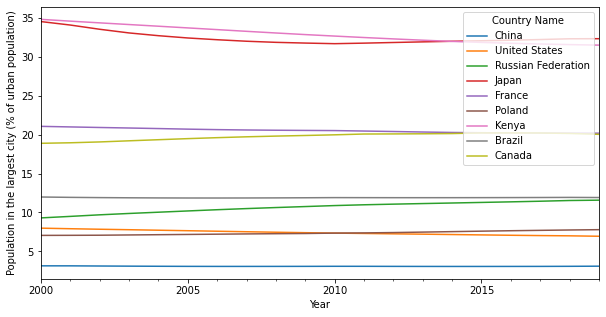

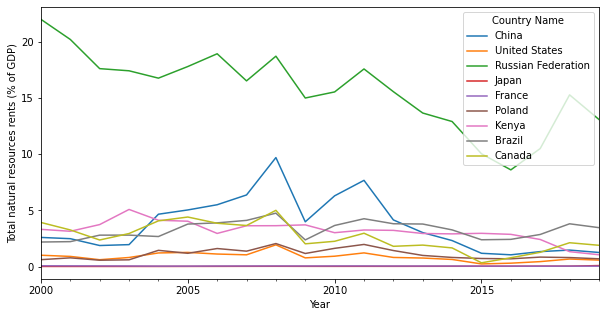

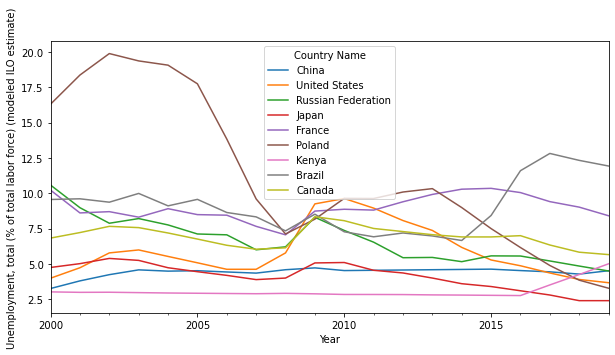

In [14]:
dataset = load_dataset()
countries = [
    "China",
    "United States",
    "Russian Federation",
    "Japan",
    "France",
    "Poland",
    "Kenya",
    "Brazil",
    "Canada",
]
for col in dataset.columns.values:
    data_to_visualize = dataset[col].unstack().loc[:, countries]
    data_to_visualize.index = pd.to_datetime(
        data_to_visualize.index.astype(str), format="%Y"
    )
    data_to_visualize.plot(figsize=(10, 5), ylabel=col)